this dataset is downloaded from "https://www.kaggle.com/search?q=Bengaluru++House+price+data"

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib

C:\Users\user\AppData\Local\Temp\ipykernel_23252\2917438681.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df=pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
# Group and count each words 
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
dfy=df.drop(["area_type","society","balcony","availability"],axis="columns")
dfy.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
dfy.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
# Drop null values 
df_clean=dfy.dropna()
df_clean.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df_clean.shape

(13246, 5)

In [10]:
df_clean['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
# To get the number of bedrooms or BHK
df_clean['bhk']=df_clean['size'].apply(lambda x: int(x.split(' ')[0]))
# we are splitting it into figure and bhk or bedrooms

C:\Users\user\AppData\Local\Temp\ipykernel_23252\1123460828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['bhk']=df_clean['size'].apply(lambda x: int(x.split(' ')[0]))


In [12]:
df_clean.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
df_clean[df_clean.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [14]:
df_clean.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
# checking if each row is float or not 
def is_float(y):
    try:
        float(y)
    except:
        return False
    return True

In [16]:
df_clean[-df_clean['total_sqft'].apply(is_float)].head(10)   #to print only those that are not float, using -ve

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [17]:
# find the average size for those that have range
def convert_sqft_to_num(x):
    tokens=x.split("-")
    if len(tokens) ==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [18]:
# to check if the code is working 
convert_sqft_to_num("3-5")

4.0

In [19]:
df_copy=df_clean

In [20]:
# To see before applying and be sure it made a difference
df_copy['total_sqft'][30]

'2100 - 2850'

In [21]:
df_copy['total_sqft']=df_copy['total_sqft'].apply(convert_sqft_to_num)

C:\Users\user\AppData\Local\Temp\ipykernel_23252\758061125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['total_sqft']=df_copy['total_sqft'].apply(convert_sqft_to_num)


In [22]:
df_copy['total_sqft'][30]

2475.0

In [23]:
# to get price per square feet
df_copy['price_per_sqft']=round(df_copy['price']*100000/df_copy['total_sqft'])
df_copy.head()

C:\Users\user\AppData\Local\Temp\ipykernel_23252\1616526562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['price_per_sqft']=round(df_copy['price']*100000/df_copy['total_sqft'])


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3700.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4306.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6246.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.0


In [24]:
len(df_copy['location'].unique())

1304

In [25]:
# To strip empty space on each row of the location column
df_copy.location=df_copy.location.apply(lambda x: x.strip())

C:\Users\user\AppData\Local\Temp\ipykernel_23252\1650278887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.location=df_copy.location.apply(lambda x: x.strip())


In [26]:
location_stats = df_copy.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [27]:
# Locations that have less than ten data point 
len(location_stats[location_stats<=10])

1052

In [28]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [29]:
df_copy.location=df_copy.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df_copy.location.unique())

C:\Users\user\AppData\Local\Temp\ipykernel_23252\255893251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.location=df_copy.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)


242

<h2>Detecting outliers and removing outliers</h2>

In [30]:
df_copy.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3700.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4306.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6246.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.0


In [31]:
# Checking different each square feet, that is less than 300
df_copy[df_copy.total_sqft/df_copy.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36275.0
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.0
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10661.0
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.0
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.0


In [32]:
df_copy.shape

(13246, 7)

In [33]:
# removing some outliers of the above 
df_lier=df_copy[-(df_copy.total_sqft/df_copy.bhk<300)]
df_lier.shape

(12502, 7)

In [34]:
df_lier['price_per_sqft'].describe()

count     12456.000000
mean       6308.499759
std        4168.132109
min         268.000000
25%        4211.000000
50%        5294.000000
75%        6917.000000
max      176471.000000
Name: price_per_sqft, dtype: float64

In [35]:
def remove_outliers(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st= np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [36]:
dfOutLier=remove_outliers(df_lier)
dfOutLier.shape

(10241, 7)

In [37]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]

    matplotlib.rcParams['figure.figsize']=(12,8)
    plt.scatter(bhk2['total_sqft'],bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3['total_sqft'],bhk3.price,marker='+',color='green',label='3 BHK', s=50)

    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()



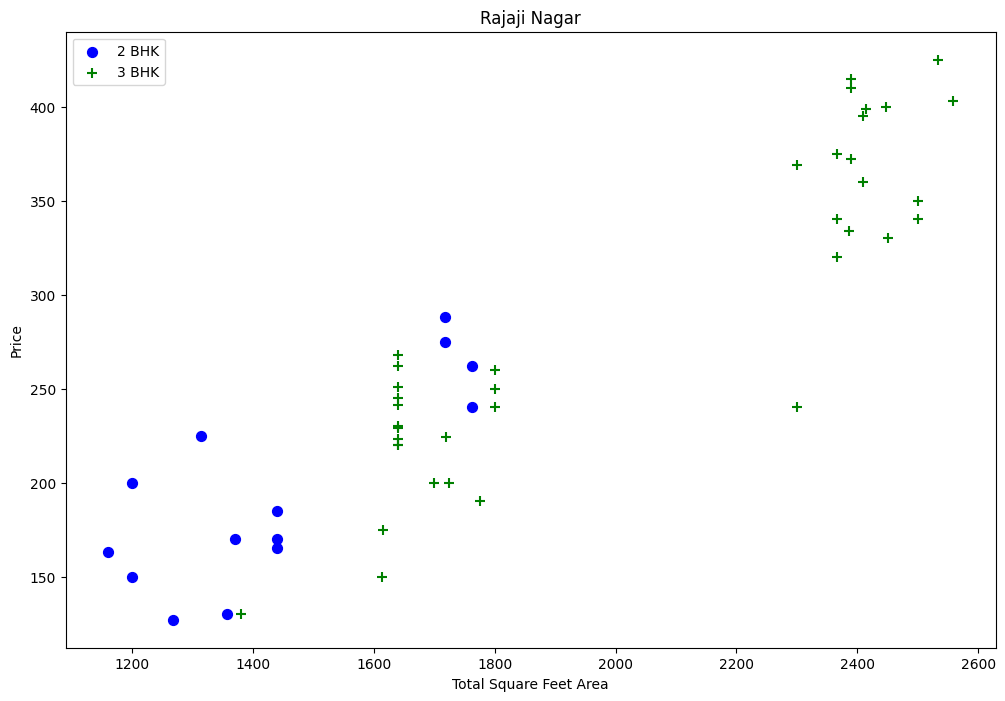

In [38]:
plot_scatter_chart(dfOutLier,'Rajaji Nagar')

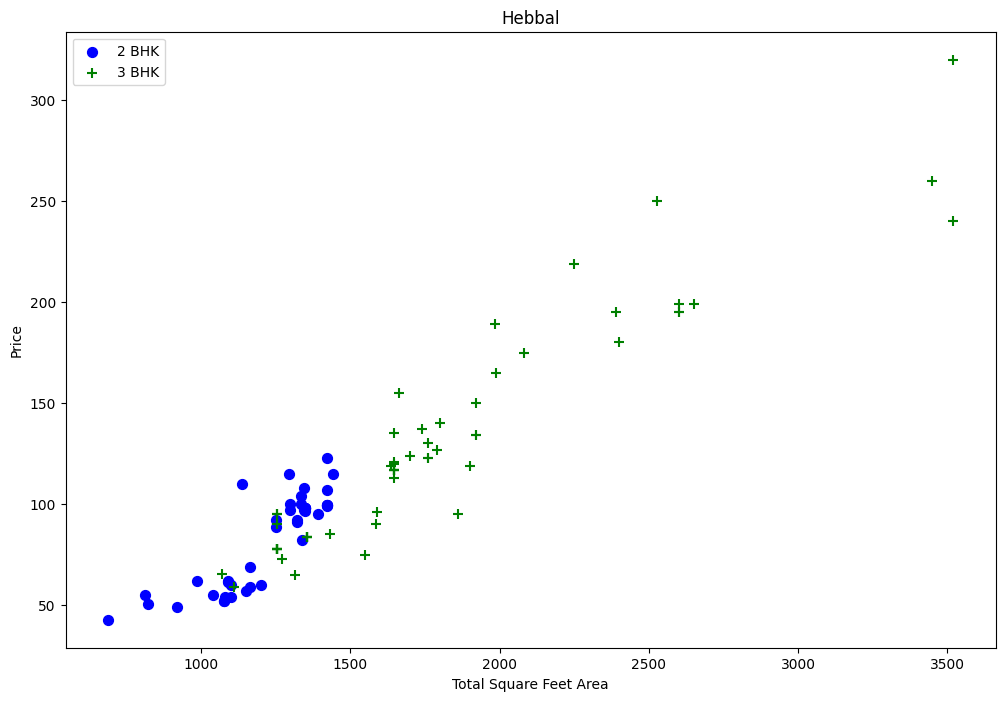

In [39]:
plot_scatter_chart(dfOutLier,'Hebbal')

we should also remove properties where for same location, the price of (for example) 3 bedrooms apartment is less than 2 bedroom apartment (with same square ft area). Where we will do is for a given location, we will build a dictionary of stats per bhk. ie

In [40]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean': np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }

        for bhk, bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
                
    return df.drop(exclude_indices,axis='index')

In [41]:
bhk_outlier=remove_bhk_outliers(dfOutLier)
bhk_outlier.shape

(7332, 7)

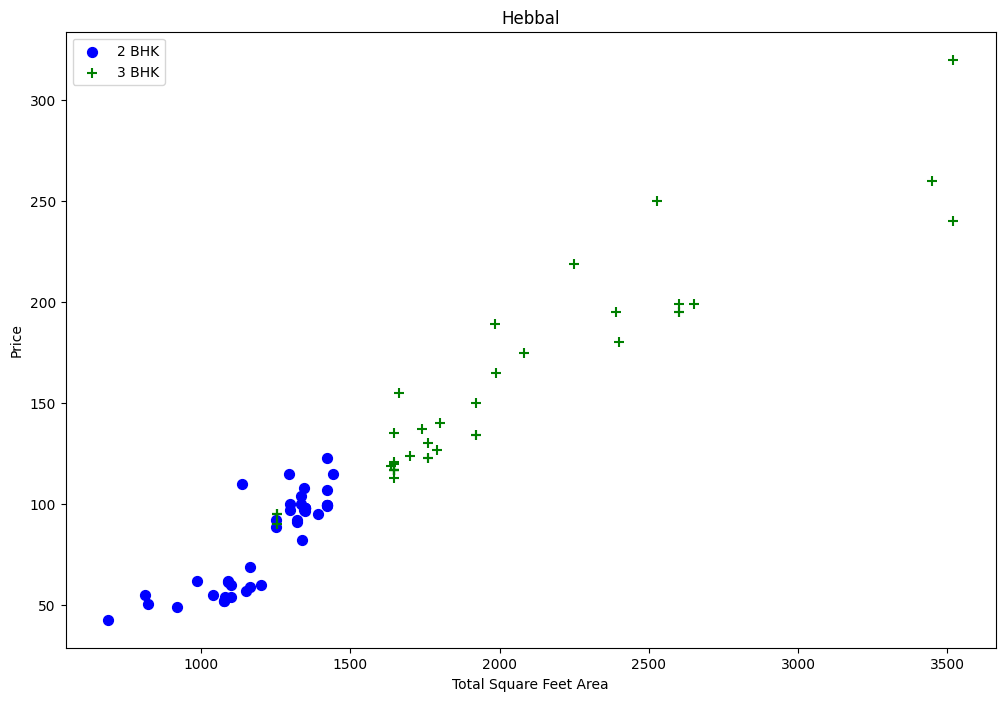

In [42]:
plot_scatter_chart(bhk_outlier,'Hebbal')

Text(0, 0.5, 'Count')

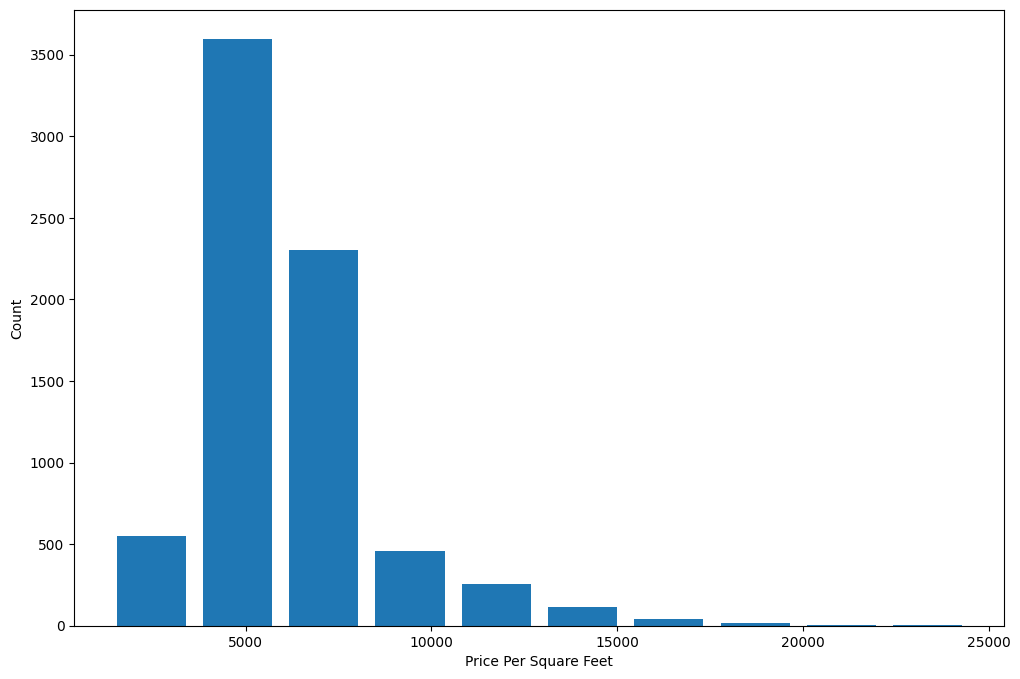

In [43]:
matplotlib.rcParams['figure.figsize']=(12,8)
plt.hist(bhk_outlier.price_per_sqft,rwidth=0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

In [44]:
bhk_outlier.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [45]:
bhk_outlier[bhk_outlier.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.0
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.0
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.0
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.0
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.0


Text(0, 0.5, 'Count')

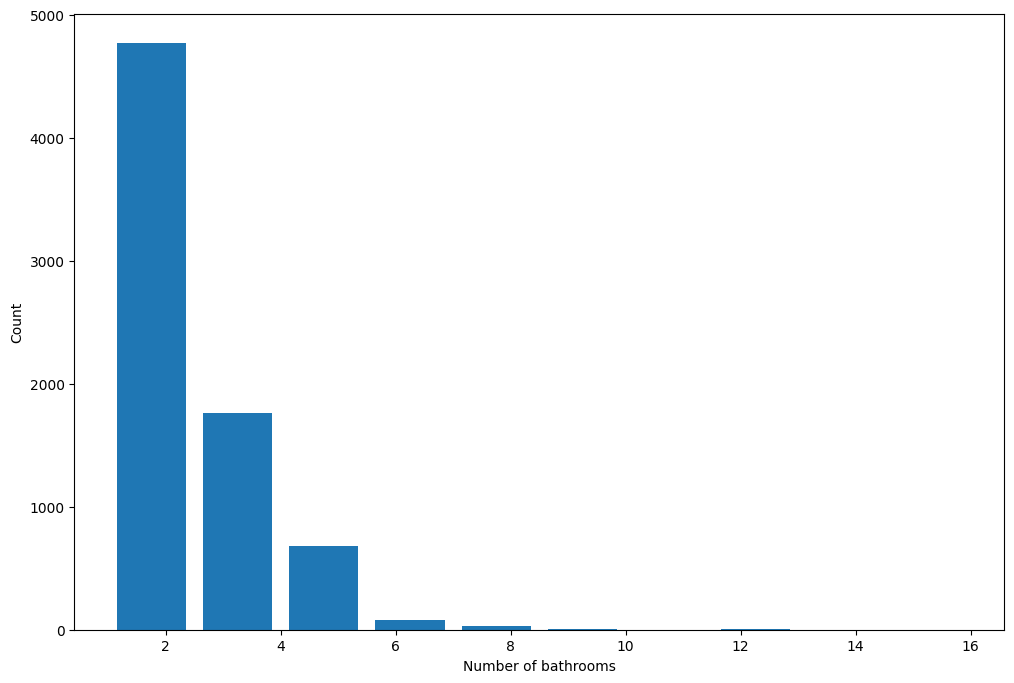

In [46]:
plt.hist(bhk_outlier.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [47]:
# To get all flat that have 2 toilet more than the no of rooms
bhk_outlier[bhk_outlier.bath>bhk_outlier.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.0
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6429.0
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.0
8411,other,6 BHK,11338.0,9.0,1000.0,6,8820.0


In [48]:
# Removing flat with higher no of toilet
dfNew=bhk_outlier[bhk_outlier.bath<bhk_outlier.bhk+2]
dfNew.shape

(7254, 7)

In [49]:
dfNew=dfNew.drop(['size','price_per_sqft'],axis=1)

In [50]:
dfNew.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [51]:
dumies=pd.get_dummies(dfNew.location).astype(int)
dumies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
dfNew=pd.concat([dfNew,dumies.drop('other',axis=1)],axis=1)
dfNew.head(4)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
dfNew=dfNew.drop('location',axis=1)
dfNew.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
dfNew.shape

(7254, 245)

In [55]:
# get our 'x'
x=dfNew.drop('price',axis=1)
x.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# get our 'y'
y=dfNew['price']
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [58]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.7827909306646228

In [59]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=7,test_size=0.2, random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.84741595, 0.81533503, 0.80245482, 0.87220326, 0.86331698,
       0.883898  , 0.86173928])

In [60]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos={
        'Linear_Regression' : {
            'model' : LinearRegression(),
            'params' : {
                'fit_intercept' :[True,False]
            }
        },
        'Lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random','cyclic']
            }
        },
        'Decision_Tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse','friedman_mse'],
                'splitter' : ['best','random']
            }
        }
    } 

    scores=[]
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", l

,model,best_score,best_params
0,Linear_Regression,0.840899,{'fit_intercept': False}
1,Lasso,0.680409,"{'alpha': 1, 'selection': 'random'}"
2,Decision_Tree,0.580273,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [61]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(x.columns==location)[0][0]   # To get the column number in the x dataset 
 
    z=np.zeros(len(x.columns))
    z[0]=sqft
    z[1]=bath
    z[2]=bhk
    if loc_index >= 0:
        z[loc_index]=1

    return lr.predict([z])[0]

In [62]:
np.where(x.columns=='1st Phase JP Nagar')[0][0]

4

In [63]:
len(x.columns)

244

In [64]:
predict_price('1st Phase JP Nagar',1000,2,2)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.27755045769645

In [65]:
# To export the train model 
import pickle
with open('bangaluru_home_price.pickle','wb') as f:
    pickle.dump(lr,f)

In [66]:
import json
columns={
    'data_columns' : [col.lower() for col in x.columns]  #To convert the column names to small letters
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))